# BUILD NAIVE BAYES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [32]:
data=pd.read_excel('HR_comma_sep.xlsx')
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
data['salary']=l.fit_transform(data['salary'])
# sns.countplot(data['salary'])
data=data.drop(columns=['sales'])
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,1
1,0.80,0.86,5,262,6,0,1,0,2
2,0.11,0.88,7,272,4,0,1,0,2
3,0.72,0.87,5,223,5,0,1,0,1
4,0.37,0.52,2,159,3,0,1,0,1


# EDA

array([[<Axes: title={'center': 'satisfaction_level'}>,
        <Axes: title={'center': 'last_evaluation'}>,
        <Axes: title={'center': 'number_project'}>],
       [<Axes: title={'center': 'average_montly_hours'}>,
        <Axes: title={'center': 'time_spend_company'}>,
        <Axes: title={'center': 'Work_accident'}>],
       [<Axes: title={'center': 'left'}>,
        <Axes: title={'center': 'promotion_last_5years'}>,
        <Axes: title={'center': 'salary'}>]], dtype=object)

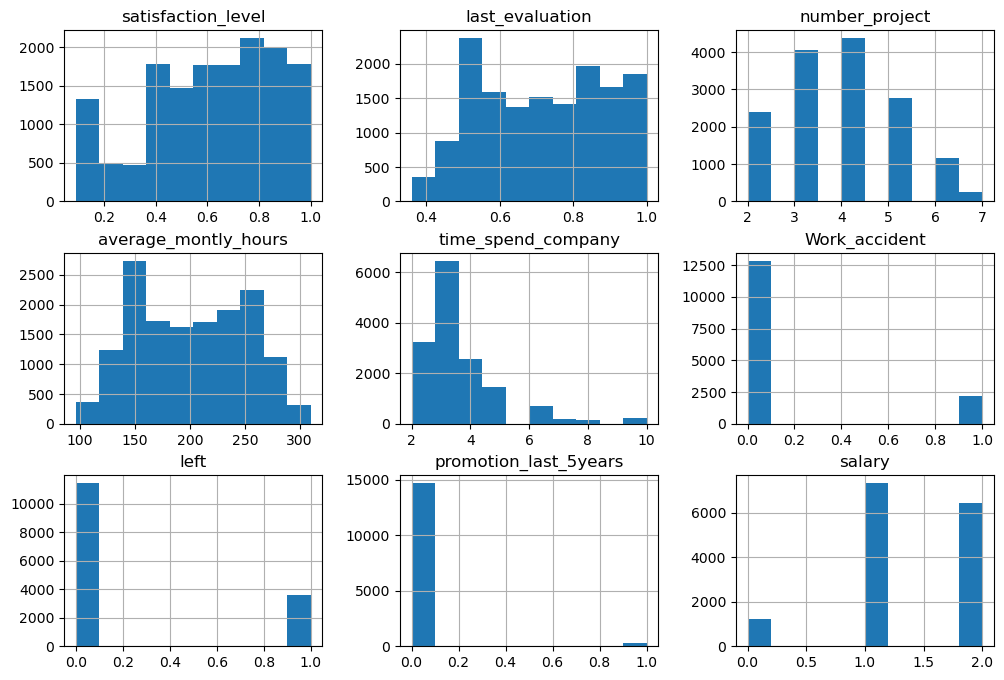

In [28]:
#EDA
data.hist(figsize=(12,8))

In [30]:
data['salary'].unique()

array([1, 2, 0])

<Axes: xlabel='salary', ylabel='count'>

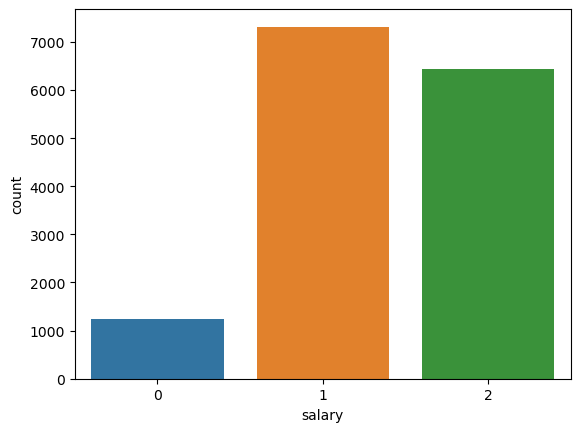

In [39]:
sns.countplot(data,x='salary')

In [33]:
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
salary                   0
dtype: int64

In [6]:
import warnings
# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,recall_score
from sklearn.model_selection import train_test_split
x=data.iloc[:,:-1]
y=data.iloc[:,-1:]
k=5
y = y.values.ravel()
x_new = SelectKBest(chi2, k=k).fit_transform(x, y)
xtrain,xtest,ytrain,ytest=train_test_split(x_new,y,test_size=0.2,random_state=6)
print('\n*****Training Data Shape" *******\n')
print("\nTraining data-X- Shape:\t",xtrain.shape)
print("\nTraining data-y- Shape:\t",ytrain. shape)
print('\n***************Testing Data Shape***************\n')
print('\nTesting data (x-Input) Shape:\t',xtest.shape)
print('\nTesting data (y-Outcome) Shape:\t',ytest.shape)


*****Training Data Shape" *******


Training data-X- Shape:	 (11999, 5)

Training data-y- Shape:	 (11999,)

***************Testing Data Shape***************


Testing data (x-Input) Shape:	 (3000, 5)

Testing data (y-Outcome) Shape:	 (3000,)


In [22]:
from sklearn.naive_bayes import GaussianNB
gaus_nb=GaussianNB()
gaus_nb.fit(xtrain,ytrain)
ypred=gaus_nb.predict(xtest)
print('\n*****Performance measure for GAUSSIAN NB classification" *******\n')
print("\n****************************** "*2)
print("\nAccuracy Score :\t",accuracy_score(ytest,ypred))

print("\n****************************** "*2)
      
print("\nConfusion Matrix:\n\n",confusion_matrix(ytest,ypred))

print("\n****************************** "*2)

print('\nClassification Report : \n\n',classification_report(ytest,ypred))
print("\n****************************** "*2)

print('\nF1 Score : \t',f1_score(ytest,ypred))

print("\n****************************** "*2)

print('\nRecall Score : \t',recall_score(ytest,ypred))





*****Performance measure for GAUSSIAN NB classification" *******


****************************** 
****************************** 

Accuracy Score :	 0.9616666666666667

****************************** 
****************************** 

Confusion Matrix:

 [[2881   66]
 [  49    4]]

****************************** 
****************************** 

Classification Report : 

               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2947
           1       0.06      0.08      0.07        53

    accuracy                           0.96      3000
   macro avg       0.52      0.53      0.52      3000
weighted avg       0.97      0.96      0.96      3000


****************************** 
****************************** 

F1 Score : 	 0.06504065040650406

****************************** 
****************************** 

Recall Score : 	 0.07547169811320754


In [21]:
from sklearn.naive_bayes import MultinomialNB
mul_nb=MultinomialNB()
mul_nb.fit(xtrain,ytrain)
ypred=mul_nb.predict(xtest)
print('\n*****Performance measure for MULTINOMIALNB classification" *******\n')
print("\n****************************** "*2)
print("\nAccuracy Score :\t",accuracy_score(ytest,ypred))

print("\n****************************** "*2)
      
print("\nConfusion Matrix:\n\n",confusion_matrix(ytest,ypred))

print("\n****************************** "*2)

print('\nClassification Report : \n\n',classification_report(ytest,ypred,zero_division=0))
print("\n****************************** "*2)

print('\nF1 Score : \t',f1_score(ytest,ypred,zero_division=0))

print("\n****************************** "*2)

print('\nRecall Score : \t',recall_score(ytest,ypred,zero_division=0))





*****Performance measure for MULTINOMIALNB classification" *******


****************************** 
****************************** 

Accuracy Score :	 0.9823333333333333

****************************** 
****************************** 

Confusion Matrix:

 [[2947    0]
 [  53    0]]

****************************** 
****************************** 

Classification Report : 

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2947
           1       0.00      0.00      0.00        53

    accuracy                           0.98      3000
   macro avg       0.49      0.50      0.50      3000
weighted avg       0.96      0.98      0.97      3000


****************************** 
****************************** 

F1 Score : 	 0.0

****************************** 
****************************** 

Recall Score : 	 0.0


In [20]:
from sklearn.naive_bayes import BernoulliNB
ber_nb=BernoulliNB()
ber_nb.fit(xtrain,ytrain)
ypred=ber_nb.predict(xtest)
print('\n*****Performance measure for  Bernoulli NB classification" *******\n')
print("\n****************************** "*2)
print("\nAccuracy Score :\t",accuracy_score(ytest,ypred))

print("\n****************************** "*2)
      
print("\nConfusion Matrix:\n\n",confusion_matrix(ytest,ypred))

print("\n****************************** "*2)

print('\nClassification Report : \n\n',classification_report(ytest,ypred,zero_division=0))
print("\n****************************** "*2)

print('\nF1 Score : \t',f1_score(ytest,ypred,zero_division=0))

print("\n****************************** "*2)

print('\nRecall Score : \t',recall_score(ytest,ypred))



*****Performance measure for  Bernoulli NB classification" *******


****************************** 
****************************** 

Accuracy Score :	 0.9823333333333333

****************************** 
****************************** 

Confusion Matrix:

 [[2947    0]
 [  53    0]]

****************************** 
****************************** 

Classification Report : 

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2947
           1       0.00      0.00      0.00        53

    accuracy                           0.98      3000
   macro avg       0.49      0.50      0.50      3000
weighted avg       0.96      0.98      0.97      3000


****************************** 
****************************** 

F1 Score : 	 0.0

****************************** 
****************************** 

Recall Score : 	 0.0
